# About This Notebook:
In this notebook, we will go to cover about Bert Model and its implementation with help of the Hugging Face library. I try to cover all theory which related to Bert’s context and try to explain code in very simple language.
After reading a lot about the Bert model, I try to implement but it takes a quite long time to understand its implementation. Bert code hardly contains 50 lines but in starting that 50 lines were very hard for me. So that I decided to write one detailed notebook which can help beginners like me and they can do more experiments regarding the model rather than spend time in implementation.


# Content:
1. Introduction
2. Why do we need Bert?
3. How did Bert come into the picture?
4. Transformer Introduction
5. Encoder part of Transformer
6. Why Bert?
7. Detailed Discussion on Bert
8. How does Bert work?
9. Fine-tuning application and examples
10. Endnote
11. References
12. Practical Implementation of the ongoing competition. 

# Introduction:
BERT stands as **Bi-directional encoder representation from transformer**. Bert is a deep learning model based on transformer and nowadays mostly used to solve natural language processing tasks and give you the best results compared to traditional methods to solve NLP problems. Bert is pertained model on large set of book corpus data(800M words) and English Wikipedia(2,500M words) launched by Google in 2018.
As we know Bert is based on Transformer which came in picture in 2017 from the research paper “**Attention is all you need**” to resolve drawbacks of standard deep learning model of RNN. So up to now we can get feeling that to understand Bert in depth we should familiar with Transformer encoder part, as Transformer is a set of bunch of encoders and decoders but we need to know about only encoder part of Transformer to understand how actually Bert works. 

# Why do we need Bert?
If we remember earlier, Word2vec and Gensim were famous for embedding before Transformer. When we had text data, we were building model by using techniques like TF-IDF(Term Frequency-Inverse Document Frequency) or w2v or both in combination but the embedding we get from w2v technique is context-independent i.e. if same word appears twice in a sentence for two different meanings, it will generate same embedding. These techniques failed to capture their essence and generate the same embedding for two different words whereas Bert is context dependent i.e. if two words come repeatedly in the same sentence, it tries to generate their embedding according to context.

For example: Let’s take this quote by Roberto Bolano:

**“I felt happy because I saw the others were happy and because I knew I should feel happy, but I wasn’t really happy.”**

Here the word happy has four different meanings but if we use old embedding techniques which are context-independent, for those techniques happy is just a word and embedding will be generated with respect to it. However Bert understands all happy words according to their context and generates embedding. Just to add one more point here that Bert uses Word Piece technique to generate embedding.


# How did Bert come into the picture?
Bert is the hottest model now, let’s have a look into the history behind it. As we know Bert is built on top of the Transformer model. This model came into picture to improve the drawbacks which we had faced in old techniques. First we will look at the transformer.
1. Transformer is a set of encoder and decoders which was introduced from the paper “Attention is all you need”. 
2. It resolves drawbacks of the earlier model which was used for machine translation and many other NLP applications by introducing the concept of self-attention layers in them.
3. The transformer is based on an attention mechanism and stores all the information i.e. memorize for long time
4. It does not require the sequential data to be processed in the order which allows more parallelization compared to RNN.
5. The Transformer consists of 6 stacked encoders and 6 stacked decoders to form the main architecture of the model and All the encoder and decoder are identical and similar in nature 

# Encoder part of Transformer:

Encoder part of the Transformer contains two layers:
1. Self-attention layer which is defined as an attention mechanism relating different positions of a single sequence in order to compute a representation of the sequence i.e. a layer that helps an encoder to look at another word in the input sentence as it encoded a specific word.
2. Feed-forward neural network layer.

After getting embedding from text, we pass input to the encoder block. In the encoder block first, it goes to a self-attention layer of the first encoder then a feed-forward layer of it, that it will pass through the second encoder, and the process continues till sixth encoder processing. So the first encoder gets input embedding whereas the rest of the encoders get inputs from their previous encoder.


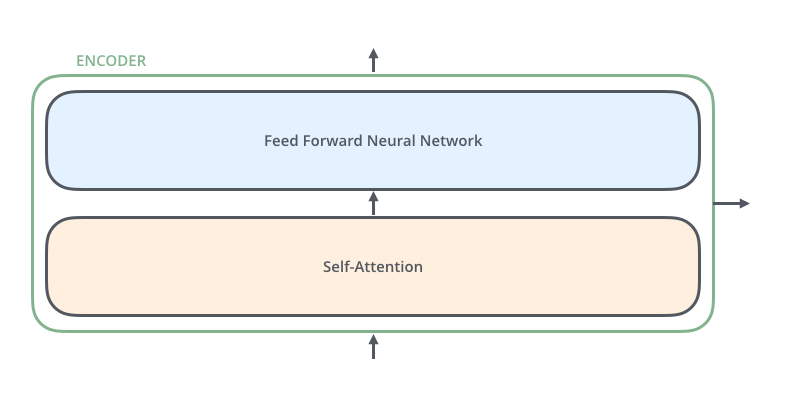

# Training Self-attention layer:
# Step-1
Like we have to train other deep neural networks in the same way we have to train the self-attention layer.
To understand the training process of the self-attention layer, I will go through the below steps:

1. We have word embedding vectors which pass to the self- attention layer and to train self-attention layer we have to create below three new vectors:
    1.     Query vector
    2.     key vector
    3.     Value vector
2. These vectors are trained and updated during the training process by multiplying your input vector(X) with weight matrices that are learnt during training.

Let’s talk about query, key, value vector to avoid any confusion when understanding the process of training the self-attention layer.

For example, When we search anything in a search engine (our query) it will map to a set of keys in the database which return output(values).

So
1. The query is set of vectors for which we want to calculate attention for,
2. Key is set of vector for which we want to calculate attention against and
3. After dot product multiplication we get weights which shows how attended each query against keys and then multiply by value to get resulting set of vectors.

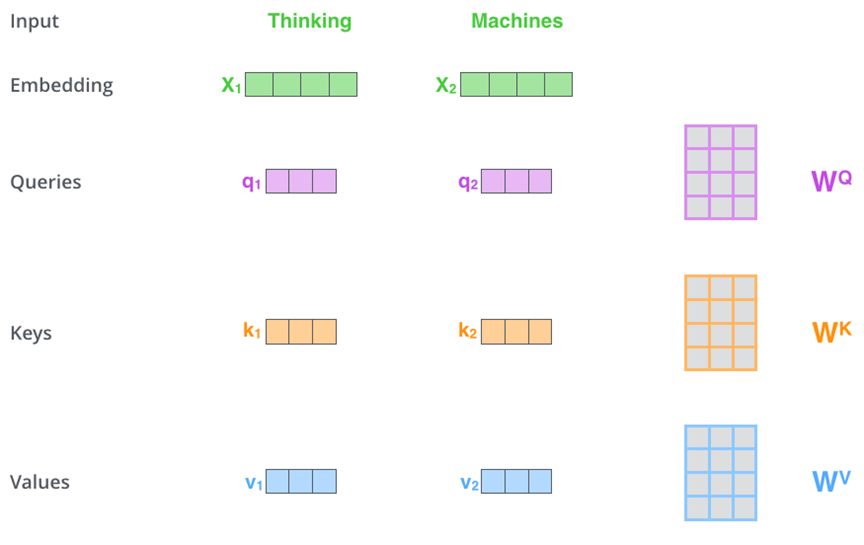


# Step-2:
1. Having Query, key, value vectors, now we calculate the score which determines how much focus we need to place on other parts of the input sentence as we encode a word at a certain position.

**Score = query*key**

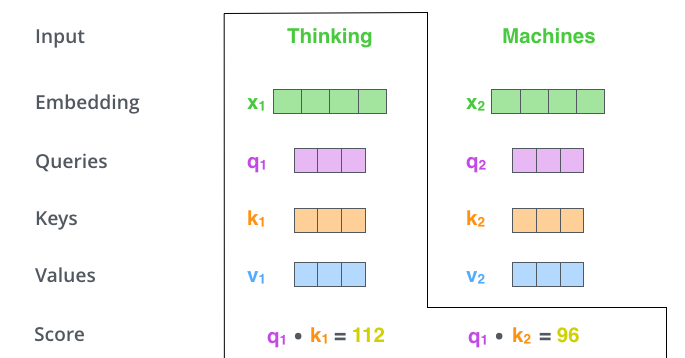


# Step-3:
1. In this step, we divide the score by 8, as we know the dimension of the query, key, value vector is 64 so to achieve a more stable gradient we divide the score by the root of their dimension.
2. After dividing, pass to softmax operation which normalizes the score. As we know after normalization all scores come in one scale so it becomes easy to determine the importance of each word expressed at their positions.

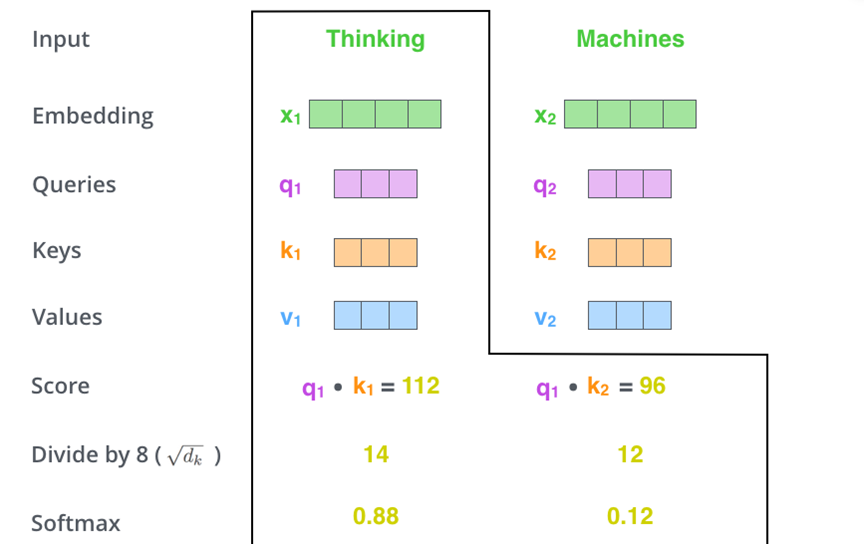

# Step-4:
1. After getting the score for each word now multiply the value vector by softmax score. Purpose of this step to keep preserve only the word we want to focus on and rest of words can be removed  by multiplying with very small number like 0.001.

# Step-5:
1. Final step is to sum up the weight value vector. This step produces the output for the self-attention layer.

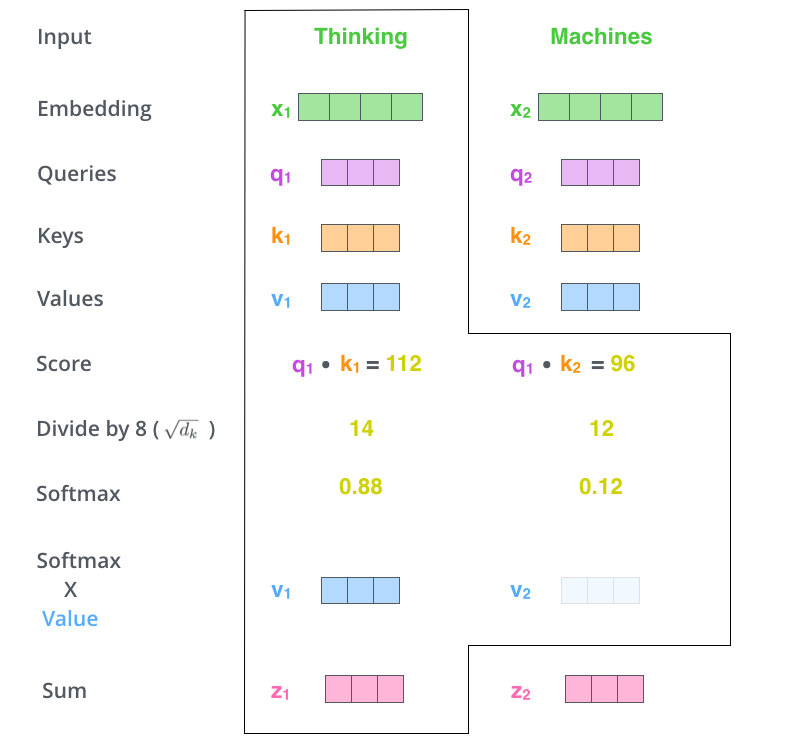

Now pass this z vector to feed-forward neural network and then this becomes the input for the next encoder and the process continues.
For Faster calculation, the whole steps which we discussed above can be done in matrix form in the following manner.

1. Create query, key, value vector by multiplying embedding with weight matrices.

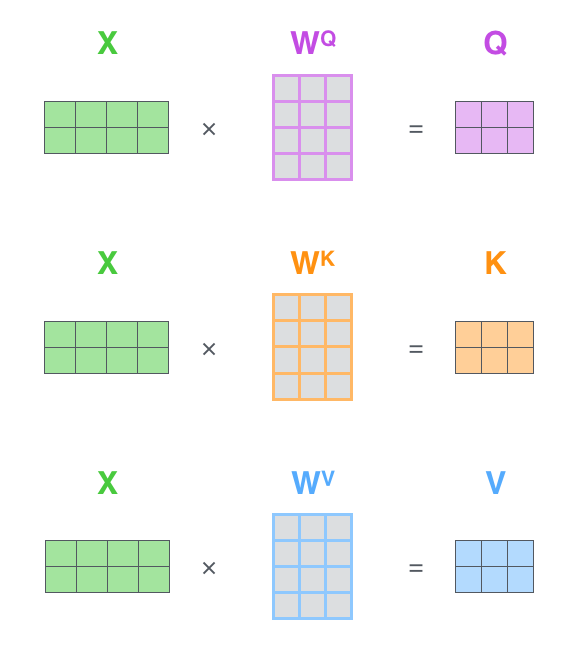

2. Now calculate output for self-attention layer in one single step.

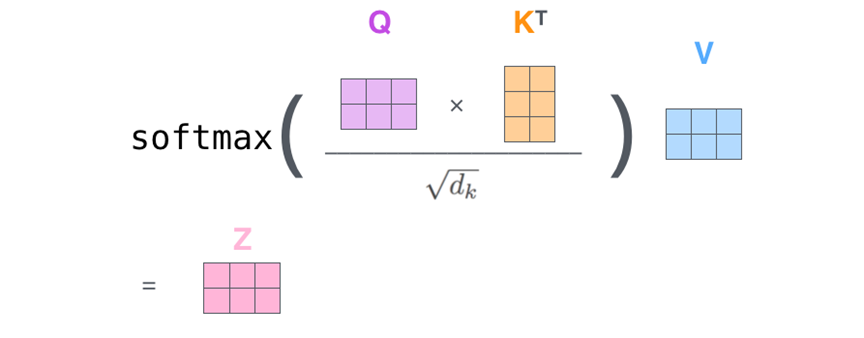

The above-mentioned step for calculating output for the self-attention layer is for one time but in actual implementation, this output is calculated parallelly and independently many times, therefore, it is referred to as Multi-head attention.


# Why Multi-head attention?
1. Many times chances of missing words that are important in a sentence are high when we used single attention but if we use multi-head attention we have multiple query, key, value weight matrices which can help us to reduce the error or miscalculation by any single attention head and also able to focus on words increases in case of multi-head attention.
2. By using multi-head attention we get eight different z matrices but the feed-forward neural network accepts only one single score, for that we perform concatenation of these eight matrices to convert them into a single matrix and which can be passed to the feed-forward layer. 

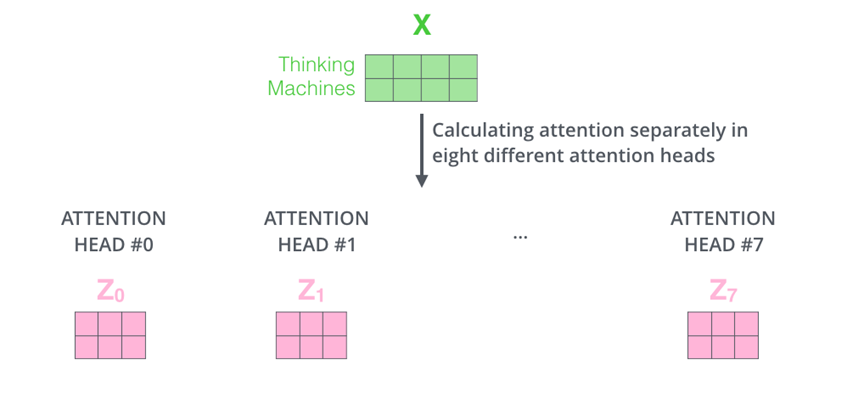

Before concluding the encoder part discussion of Transformer, I would like to mention about Residual Connection  which allow the output from the previous layer to bypass layers in between i.e. It skip some layers that are not so important or not learninh much.After the residual connections are added we get normalized resultant.

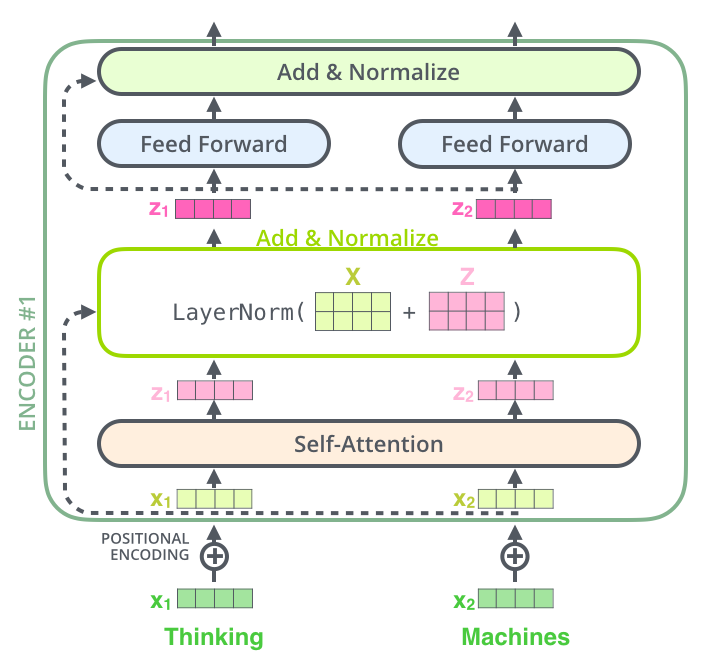

# Welcome BERT:

Do you think to solve every NLP task we need both the encoder and decoder parts of Transformer?

The answer is NO, task like classification problem, Question- Answers task (we need to pass two different sentences) in these kind of task we do not need to use Decoder part of Transformer and that’s the reason, Model like Bert takes a entry in field of data science to solve many application of NLP tasks.

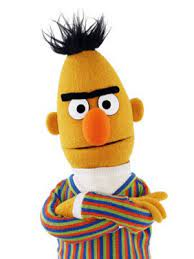

# BERT:
Bert is a pre-trained model on a large set of book corpus and wikipedia unlabeled data and can be fine-tuned according to our task demand. Bert is launched in 2018 by Google.
To understand Bert in more depth we discuss two major steps in this section known as: 
1. Pre-training, and
2. Fine-tuning

Pre-trained model is already trained on unlabeled data over different pre-training tasks so we don’t need to trained model from scratch but we can fine-tuned it by reproduce the model if we initialized with the pre-trained parameters and all of the parameters are fine-tuned using labeled data from downstream task.

# Model Architecture:
BERT uses a multi-layer bidirectional Transformer encoder.Google has released two variants of the model:


1. BERT(base):
    - Number of layers(L)=12,Hidden size(H)=768 and Total Paramters=110M.
2. BERT(large)
    - Number of layers(L)=24,Hidden size(H)=1024 and Total Paramters=340M.

In both variants number of layers means Transformer blocks.


# Model Input:
As we know Bert handles many variants of downstream tasks such as Question-Answer, Classification etc. and with respect to tasks our input is able to represent both a pair of sentences and a single sentence in one token sequence.

1. Input IDs:
    - First we have to perform tokenization which splits a text into words or sub words. To perform this task, Bert uses WordPiece embeddings with a 30,000 token vocabulary.
    - We add two special tokens:
        - [CLS] token: represent classification toke which should be put before start of any sentence
        - [SEP] token: used to distinguish pairs of sentences.

Let’s suppose we are fine tuning the Bert model for a question-answer task which has two sentences, one is a question and another is answer. Hence our input should be in form like ([CLS]+Question+[SEP]+Answer+[SEP]), whereas adding [SEP] token is not necessary when we are dealing with classification task as we will be going to pass only single sentence, in this case our input look like this ([CLS]+text).

2. Segment Embedding:indicating whether tokens belongs to sentence A and or sentence B.
3. Attention Mask:indicates to the model which tokens should be attended to, and which should not be by giving Boolean value 0 and 1 for padded token and real token.

# Model Output:

Bert gives two types of output
1. Pooled_output: Pooled output of shape [batch size, 768] which represents the entire input sequence. It is the output of the ‘[CLS]’ token that we add at the start of each sentence.
2. Sequence_output: Sequence_output of shape [batch size, max_seq_len, 768] which represents the entire input sequence.


# Pre-Training Bert:

Bi-directionality is a game changer approach in NLP which actually allows each word to see itself so the model could predict the target word in a multi-layered context. This was missing in standard conditional language models because they can be trained either left-to-right or right-to-left.
So to pre-trained Bert, Google used two unsupervised tasks:
1. Masked Language Model and 
2. Next sentence prediction

# Masked Language Model:
1. To train a deep bidirectional representation, we mask some percentage of input tokens at random and then predict those masked tokens nd for this purpose they mask randomly 15% of wordpiece tokens in each sequence at random.

But remember we are masking tokens at pre-trained, this procedure does not appear in fine-tuning. Hence we do not always replace masked words with actual [MASK] tokens.

To avoid that researchers used the below techniques:

1. 80% of the time the words were replaced with the masked token [MASK]
2. 10% of the time the words were replaced with random word
3. 10% of the time the words were left unchanged
Advantage of Masked Language Modeling is that the Transformer encoder does not know which words it will be asked to predict or which have been replaced by random words, so it is forced to keep a distributional contextual representation of every input token.

# Next Sentence Prediction:

Next sentence prediction task is a binary classification task in which, given a pair of sentences, it is predicted if the second sentence is the actual next sentence of the first sentence.
It is helpful because many downstream tasks such as Question and Answering and Natural Language Inference require an understanding of the relationship between two sentences.


# Fine Tuning 
We can fine-tuned Bert model for the following task:

**Question-Answering Tasks:**
As we already discussed, Bert accepts input sentences by adding two special tokens one is [CLS] and another is [SEP]. [CLS] stands for classification and we know that for question-answering tasks we do not need to consider output regarding [CLS] tokens. We just consider output of 768 dim from the answer and each output has two softmax layers, one for start span and another for end span. That softmax layer predicts the probability of that token i(for example) in the start of span and in the end of span. Here every token has two probability and we pick max span probability from those as the starting index of the paragraph.

**Sequence Classification Tasks:**
When we have one single sentence we do not need to use [SEP] token to design input for Bert model. All calculations happening regarding [CLS] token and label probabilities are computed with a standard softmax.


# End Note:
No doubt first Transformer and then Bert model makes a huge development and improvement in Natural language processing in data science, But only getting theoretical knowledge is not enough so in the next section let us implement this theory in application with help of Hugging face library.


# Refrences:
1. Bert: https://arxiv.org/pdf/1810.04805.pdf
2. The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning): http://jalammar.github.io/illustrated-bert/
3. The Illustrated Transformer: https://jalammar.github.io/illustrated-transformer/
4. Attention Is All You Need: https://arxiv.org/pdf/1706.03762.pdf
5. Query,key,value vector: https://stats.stackexchange.com/questions/421935/what-exactly-are-keys-queries-and-values-in-attention-mechanisms

In [ ]:
from typing import List, Tuple
import random
import html

import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold, KFold
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import tensorflow as tf
import tensorflow.keras.backend as K
import os
from scipy.stats import spearmanr
from scipy.optimize import minimize
from math import floor, ceil
from transformers import *
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model

# Load Dataset:

In [ ]:
train=pd.read_csv("../input/commonlitreadabilityprize/train.csv")
test=pd.read_csv('../input/commonlitreadabilityprize/test.csv')
sub=pd.read_csv("../input/commonlitreadabilityprize/sample_submission.csv")
def get_dataset_information(df):
    print("Number of Columns in dataset:",df.shape[1])
    print("Number of Rows in dataset:",df.shape[0])
    print("Name of Columns in dataset:",df.columns)
    return df.head(2)
get_dataset_information(train) 

# Define Input and output categories

In [ ]:
output_categories = train['target']
input_categories = train['excerpt']
print('\noutput categories:\n\t', output_categories)
print('\ninput categories:\n\t', input_categories)

# Load Tokeizer

In [ ]:
max_seq_length=512

tokenizer = BertTokenizer.from_pretrained('../input/huggingface-bert/bert-large-uncased/vocab.txt')

# Preparition for Bert Input

In [ ]:
def fix_length(tokens, max_sequence_length=512):
    length = len(tokens)
    if length > max_sequence_length:
        tokens = tokens[:max_sequence_length-1]
    return tokens

# function for tokenizing the input data for transformer.
def transformer_inputs(text,tokenizer,MAX_SEQUENCE_LENGTH = 512):

    text_tokens = tokenizer.tokenize(str(text))
    text_tokens = fix_length(text_tokens)
    ids_q = tokenizer.convert_tokens_to_ids(["[CLS]"] + text_tokens)
    padded_ids = (ids_q + [tokenizer.pad_token_id] * (MAX_SEQUENCE_LENGTH - len(ids_q)))[:MAX_SEQUENCE_LENGTH]
    token_type_ids = ([0] * MAX_SEQUENCE_LENGTH)[:MAX_SEQUENCE_LENGTH]
    attention_mask = ([1] * len(ids_q) + [0] * (MAX_SEQUENCE_LENGTH - len(ids_q)))[:MAX_SEQUENCE_LENGTH]

    return padded_ids, token_type_ids, attention_mask

# function for creating the input_ids, masks and segments for the bert input
def input_for_model(df, tokenizer):
    print(f'generating input for transformer...')
    input_ids, input_token_type_ids, input_attention_masks = [], [], []
    for text in tqdm(zip(df['excerpt'].values)):
        ids, type_ids, mask = transformer_inputs(text,tokenizer)
        input_ids.append(ids)
        input_token_type_ids.append(type_ids)
        input_attention_masks.append(mask)
    
    return (
        np.asarray(input_ids, dtype=np.int32),
        np.asarray(input_attention_masks, dtype=np.int32),
        np.asarray(input_token_type_ids, dtype=np.int32))

def compute_output_arrays(df, columns):
    return np.asarray(df[columns])

In [ ]:
inputs=input_for_model(train,tokenizer)
test_inputs=input_for_model(test,tokenizer)
outputs=compute_output_arrays(train,'target')

# Create BERT Model

In [ ]:
def create_model():
    K.clear_session()
    config=BertConfig()
    config.output_hiffen_states=False

    bert_model=TFBertModel.from_pretrained('../input/huggingface-bert/bert-base-uncased/tf_model.h5',config=config)
    max_len=512
    input_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    token_type_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="token_type_ids")
    attention_mask = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

    sequence_output = bert_model(input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)[0]
    clf_output = sequence_output[:, 0, :]
    clf_output = Dropout(.1)(clf_output)
    out = Dense(1, activation='linear')(clf_output)

    model = Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=out)
    
    return model

# Evaluation Matric:
Root mean square error

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError
def root_mean_square_error(label,prediction):
    return tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(label, prediction)))).numpy()

In [ ]:
gkf = GroupKFold(n_splits=7).split(X=train.excerpt, groups=train.excerpt)
valid_preds = []
test_preds = []
for fold,(train_idx,valid_idx) in enumerate(gkf):

    train_inputs=[inputs[i][train_idx] for i in range(3)]
    train_outputs=outputs[train_idx].reshape((-1,1)).flatten()

    valid_inputs = [inputs[i][valid_idx] for i in range(3)]
    valid_outputs = outputs[valid_idx].reshape((-1,1)).flatten()
    K.clear_session()
    model=create_model()
    model.compile(tf.keras.optimizers.Adam(lr=1e-4), loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    model.fit(train_inputs, train_outputs, epochs=5, batch_size=8,validation_data=(valid_inputs, valid_outputs))


    valid_preds.append(model.predict(valid_inputs))
    test_preds.append(model.predict(test_inputs))
    

In [ ]:
sub['target']=model.predict(test_inputs)
sub.to_csv('submission.csv', index=False)